In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
import pandas_datareader.data as web
from pylab import rcParams
rcParams['figure.figsize'] = 10,3
rcParams['axes.titlesize']=15
rcParams['font.size']=12
rcParams['figure.facecolor']= '0.75'
rcParams['legend.fontsize'] = 'small'
rcParams['figure.titlesize'] = 'small'
rcParams['legend.loc'] = 'upper right'

C:\Users\Amol\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#Get data from Yahoo Finance API
start = dt.datetime(2007,1,1)
end = dt.datetime(2018,1,1)
data = web.DataReader('AMZN','yahoo',start,end)
print(data.head())

#Save Data in csv
excel = data.to_csv('StockMarketData_timeseries.csv')
df = pd.read_csv('StockMarketData_timeseries.csv')

df.head()

                 High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2007-01-03  39.060001  38.049999  38.680000  38.700001  12405100  38.700001
2007-01-04  39.139999  38.259998  38.590000  38.900002   6318400  38.900002
2007-01-05  38.790001  37.599998  38.720001  38.369999   6619700  38.369999
2007-01-08  38.310001  37.169998  38.220001  37.500000   6783000  37.500000
2007-01-09  38.060001  37.340000  37.599998  37.779999   5703000  37.779999


,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-01-03,39.060001,38.049999,38.680000,38.700001,12405100,38.700001
1,2007-01-04,39.139999,38.259998,38.590000,38.900002,6318400,38.900002
2,2007-01-05,38.790001,37.599998,38.720001,38.369999,6619700,38.369999
3,2007-01-08,38.310001,37.169998,38.220001,37.500000,6783000,37.500000
4,2007-01-09,38.060001,37.340000,37.599998,37.779999,5703000,37.779999


In [3]:
#Set Index
df.set_index('Date', inplace=True)
df.index=pd.to_datetime(df.index)
print (df.head())

                 High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2007-01-03  39.060001  38.049999  38.680000  38.700001  12405100  38.700001
2007-01-04  39.139999  38.259998  38.590000  38.900002   6318400  38.900002
2007-01-05  38.790001  37.599998  38.720001  38.369999   6619700  38.369999
2007-01-08  38.310001  37.169998  38.220001  37.500000   6783000  37.500000
2007-01-09  38.060001  37.340000  37.599998  37.779999   5703000  37.779999


In [4]:
#Describe Data
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2769.000000,2769.000000,2769.000000,2769.000000,2.769000e+03,2769.000000
mean,326.417746,319.609534,323.160405,323.198747,5.819864e+06,323.198747
std,282.158772,278.405908,280.535305,280.383049,4.992703e+06,280.383049
min,37.070000,34.680000,35.290001,35.029999,9.844000e+05,35.029999
25%,95.849998,93.070000,94.989998,94.410004,3.034100e+06,94.410004
50%,230.679993,224.600006,226.589996,227.350006,4.559400e+06,227.350006
75%,400.200012,393.799988,398.290009,397.970001,7.077900e+06,397.970001
max,1213.410034,1191.150024,1204.880005,1195.829956,1.043292e+08,1195.829956


# Calculate Daily Percentage

In [5]:
df['Daily Returns']= (df['Close']/df['Close'].shift(1))-1
df.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Returns
Date,,,,,,,
2007-01-03,39.060001,38.049999,38.680000,38.700001,12405100,38.700001,NaN
2007-01-04,39.139999,38.259998,38.590000,38.900002,6318400,38.900002,0.005168
2007-01-05,38.790001,37.599998,38.720001,38.369999,6619700,38.369999,-0.013625
2007-01-08,38.310001,37.169998,38.220001,37.500000,6783000,37.500000,-0.022674
2007-01-09,38.060001,37.340000,37.599998,37.779999,5703000,37.779999,0.007467


# Measure Volatility

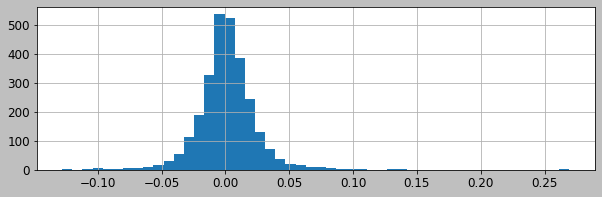

In [6]:
df['Daily Returns'].hist(bins=50)

The wider the histograph, the higher the sd and variance.

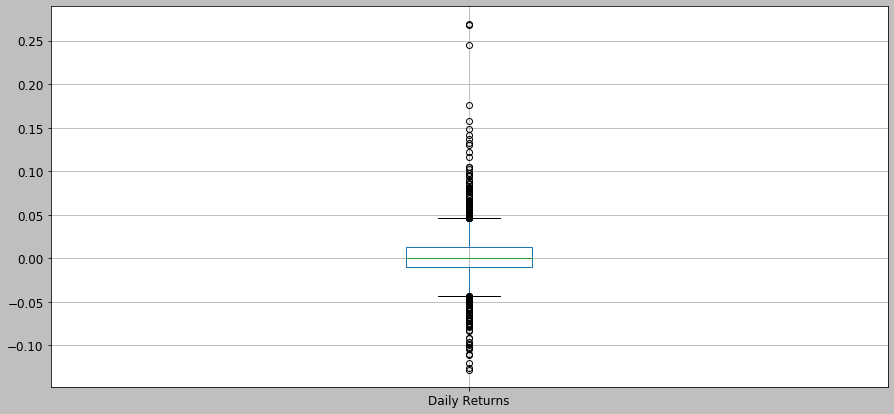

In [7]:
box_df = df.boxplot(column=['Daily Returns'],figsize=(15,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A65F1274C8>,
      dtype=object)

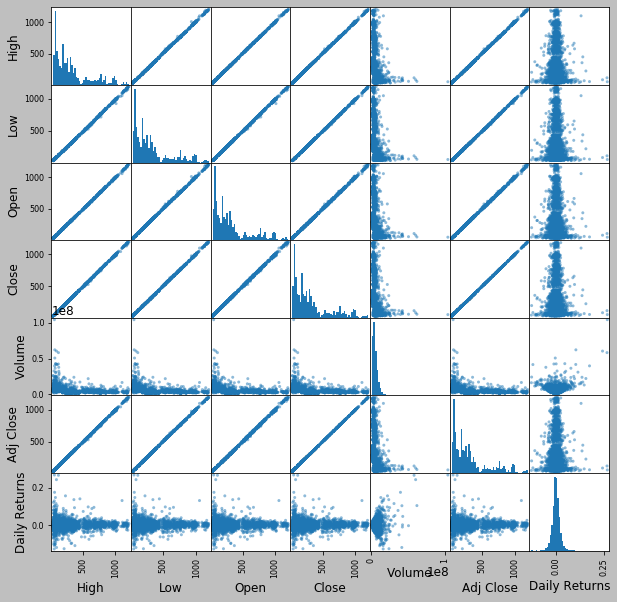

In [8]:
from pandas.plotting import scatter_matrix

#Check valatility by using scatter plot
scatter_matrix(df,figsize=(10,10),hist_kwds= {'bins' : 50},alpha=0.5)

Based on this scatter plot, we can see that there is no relationship between combination of variables for 'Volume' and 'Daily Returns' as these two variabes have no linear cluster in above chart.
Whereas we can see the straight line that might have some relationship between them and possiblity of correlation between two variables. Hence, the variables 'High, Low, Open, Close, Adj Close' might have some trend between them because they move in the same direction, positive correlated. 

# Cumulative Return

In [9]:
df['Cumulative Returns'] =  (1 + df['Daily Returns']).cumprod()
df.head()


,High,Low,Open,Close,Volume,Adj Close,Daily Returns,Cumulative Returns
Date,,,,,,,,
2007-01-03,39.060001,38.049999,38.680000,38.700001,12405100,38.700001,NaN,NaN
2007-01-04,39.139999,38.259998,38.590000,38.900002,6318400,38.900002,0.005168,1.005168
2007-01-05,38.790001,37.599998,38.720001,38.369999,6619700,38.369999,-0.013625,0.991473
2007-01-08,38.310001,37.169998,38.220001,37.500000,6783000,37.500000,-0.022674,0.968992
2007-01-09,38.060001,37.340000,37.599998,37.779999,5703000,37.779999,0.007467,0.976227


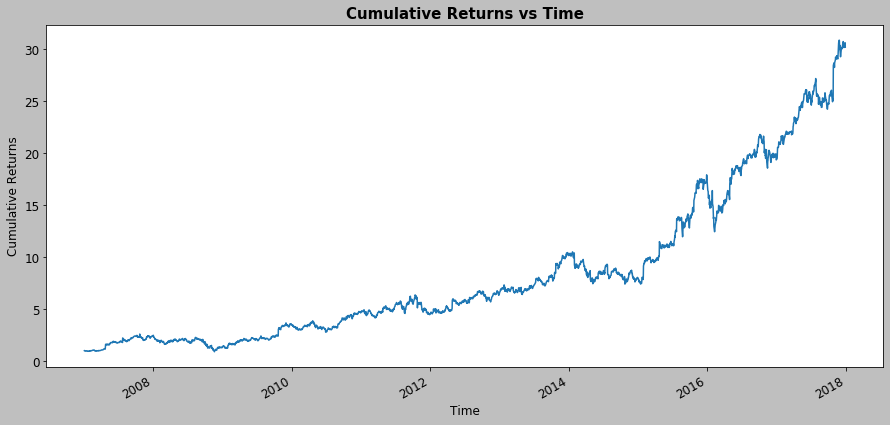

In [10]:
df['Cumulative Returns'].plot(figsize=(15,7))
plt.title('Cumulative Returns vs Time', fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.show()

This shows that one dollar invested in 2007, it would gain profit 30 times in 2018 as it reached to dollar 30 in 2018. So, We can say that Amazon is fastest growing stock.

# Measure Max Closing Price

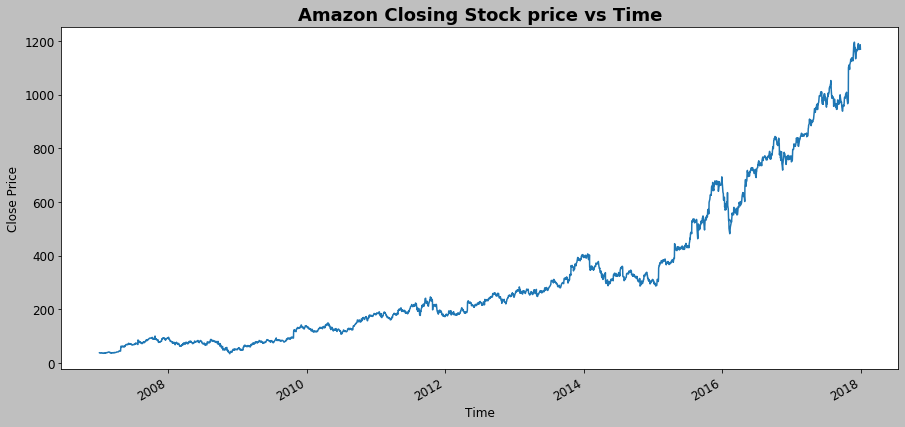

In [11]:
plt.figure(figsize=(15,7))
df['Close'].plot()
plt.title('Amazon Closing Stock price vs Time', fontdict={'fontweight':'bold','fontsize':18})
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

As per above graph, It can be observed that Amazon stock price went up from 500 t0 1200 from 2015 to 2018. In these years Amazon launched new technologies (Amazon Dash button, Amazon fresh, Amazon Fire TV etc) and new acquisition with whole foods and walmart. This could be reason for speedy rise in Amazon stock.

In [12]:
#to illustare exact time when stock closing price reched to max
df.iloc[[df['Close'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Daily Returns,Cumulative Returns
Date,,,,,,,,
2017-11-27,1213.410034,1191.150024,1202.660034,1195.829956,6744000,1195.829956,0.008288,30.899998


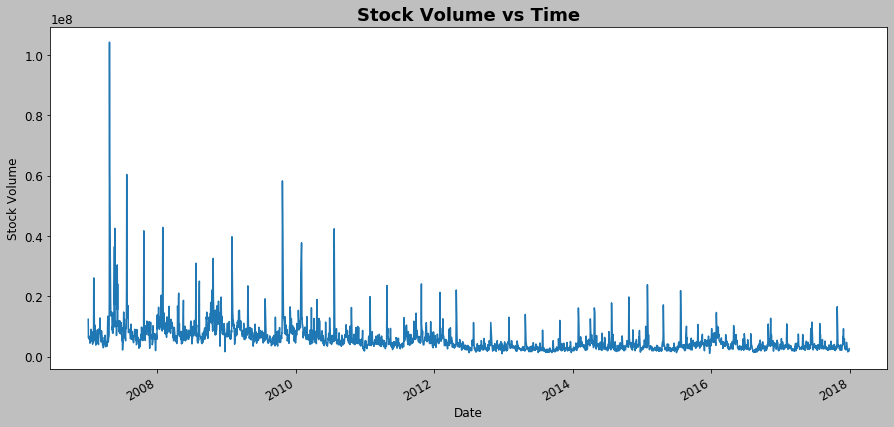

In [13]:
plt.figure(figsize=(15,7))
df['Volume'].plot()
plt.xlabel('Date')
plt.ylabel('Stock Volume')
plt.title('Stock Volume vs Time', fontdict={'fontweight':'bold','fontsize':18})
plt.show()

As per above plotted graph, this can be observed that the volume traded for amazon stock went up in 2007 in tough period when financial and housing market had collapsed. Whereas, Amazon and also other tech companies had great year 2007. It can be because of there businesses had nothing to do with housing.

In [14]:
#to illustare exact time when stock volume reched to max

df.iloc[[df['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Daily Returns,Cumulative Returns
Date,,,,,,,,
2007-04-25,57.18,52.950001,53.119999,56.810001,104329200,56.810001,0.269497,1.467959


# Total Volume 

In [15]:
df['Total Volume']= df['Open']*df['Volume']
df.head()
df.iloc[[df['Total Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Daily Returns,Cumulative Returns,Total Volume
Date,,,,,,,,,
2017-10-27,1105.579956,1050.550049,1058.140015,1100.949951,16565000,1100.949951,0.132164,28.448319,1.752809e+10


This table shows the highest total volume traded and it is noticed that the Daily Returns which jumped up by 13%. The strong growth and proven ability to invest in new opportunities was the result of Amazon's success.